In [72]:
import os
import subprocess
import codecs
import pandas as pd
import codecs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import locale
from locale import atof
from jinja2 import Template
import jinja2
%matplotlib inline

## Daten Einlesen und bereinigen

In [73]:
data = pd.read_csv('jahresuebersicht.csv', delimiter=';', thousands='.', encoding = "ISO-8859-1")
data.dropna(axis=1, inplace=True)

locale.setlocale(locale.LC_NUMERIC, '')
data['Preis'] = data['Preis'].apply(atof)
data['Einheit'] = data['Einheit'].apply(int)

#Monate als Kategorie festlegen damit sie nicht alphabetisch sondern nach Reihenfolge im Kalender sortiert werden
months = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']
data['Monat'] = pd.Categorical(data['Monat'], categories=months, ordered=True)

In [74]:
data.head()

,Kürzel,Warengruppe,Einheit,Preis,Jahr,Monat,Kunde
0,1002,Blechkuchen,60,16.0,2019,Januar,Edeka Berlin
1,1002,Blechkuchen,60,16.0,2019,Februar,Edeka Berlin
2,1002,Blechkuchen,60,16.0,2019,März,Edeka Berlin
3,1002,Blechkuchen,60,16.0,2019,April,Edeka Berlin
4,1002,Blechkuchen,100,16.0,2019,Mai,Frischkauf


In [75]:
data['Umsatz'] = data['Einheit'] * data['Preis']

## Auswertung

Umsätze dargestellt nach Monat

In [76]:
profit_data = data.groupby('Monat').sum()[['Einheit','Umsatz']]
profit_data.sort_index()

,Einheit,Umsatz
Monat,,
Januar,132560,214708.0
Februar,178360,302236.0
März,227960,396361.0
April,265560,466378.5
Mai,280320,493065.0
Juni,292890,513260.0
Juli,293300,516112.0
August,296000,515308.0
September,301750,527854.5


In [77]:
min_sales_mon = profit_data.Umsatz.idxmin()
min_sales_val = profit_data.Umsatz.min()

max_sales_mon = profit_data.Umsatz.idxmax()
max_sales_val = profit_data.Umsatz.max()

sales_year = profit_data.Umsatz.sum()

print('Monat mit geringstem Umsatz:', min_sales_mon, min_sales_val, '€')
print('Monat mit höchstem Umsatz:', max_sales_mon, max_sales_val, '€')
print('Gesamtumsatz:', sales_year, '€') 

Monat mit geringstem Umsatz: Januar 214708.0 €
Monat mit höchstem Umsatz: Dezember 557602.5 €
Gesamtumsatz: 5575354.0 €


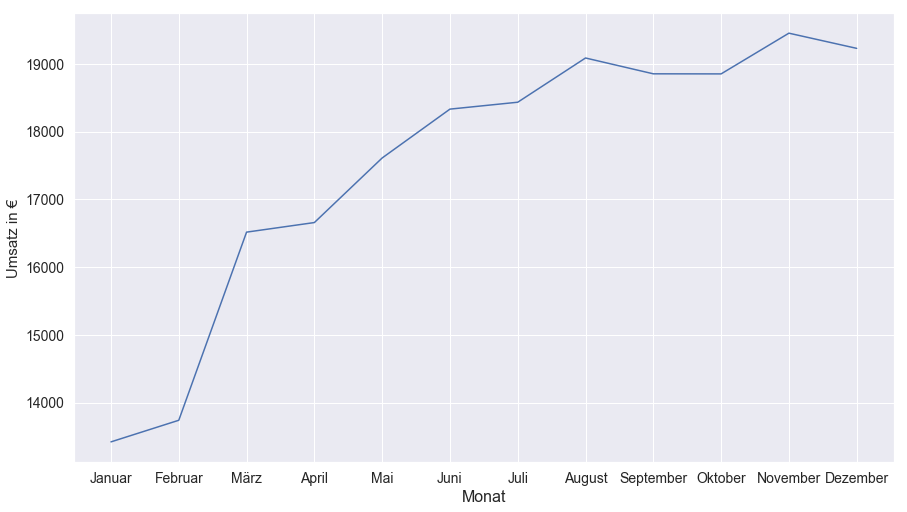

In [78]:
rcParams['figure.figsize'] = 14.7,8.27
sns.set()
month_sales_plot = sns.lineplot(data = data, x = 'Monat', y = 'Umsatz', palette = 'Blues_d', ci=None)
month_sales_plot.set_xlabel("Monat",fontsize=16)
month_sales_plot.set_ylabel("Umsatz in €",fontsize=15)
month_sales_plot.tick_params(labelsize=14)
month_sales_plot.figure.savefig(r"img\jahresumsatz.png")

Top Kunden

In [79]:
customer_data = data.groupby('Kunde').Einheit.sum()
customer_data = customer_data.sort_values(ascending=False)
top_customer = (customer_data.index[0], customer_data[0])
second_customer = (customer_data.index[1], customer_data[1])
third_customer = (customer_data.index[2], customer_data[2])
flop_costomer = (customer_data.index[-1], customer_data[-1])
max_3 = sorted(list(customer_data.sort_values(ascending=False).iloc[0:3].index))

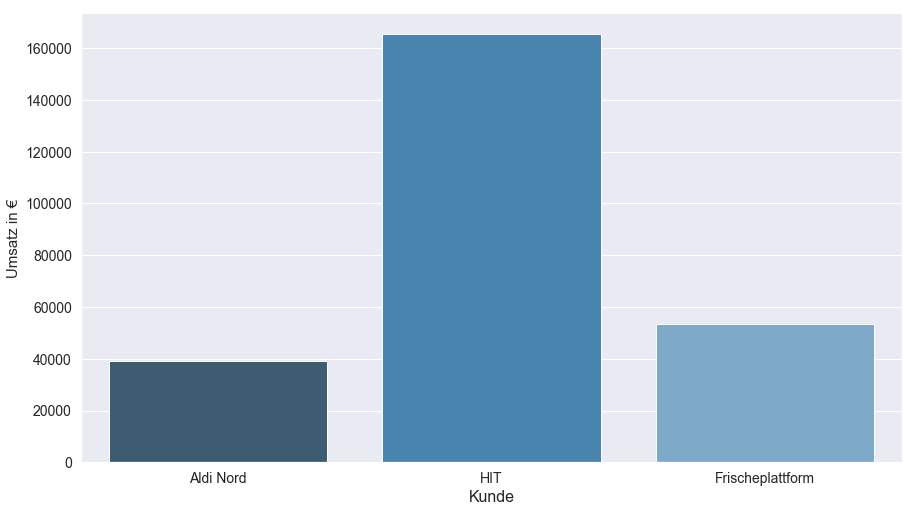

In [80]:
top_customer_plot = sns.barplot(data = data[data['Kunde'].isin(max_3)], x = 'Kunde', y = 'Umsatz', palette = 'Blues_d', ci=None)
top_customer_plot.set_xlabel("Kunde",fontsize=16)
top_customer_plot.set_ylabel("Umsatz in €",fontsize=15)
top_customer_plot.tick_params(labelsize=14)
top_customer_plot.figure.savefig(r'img\top_kunden.png')

Top und flop Produkte

In [81]:
product_data = data.groupby('Warengruppe').Umsatz.sum()

In [82]:
product_data.sort_values(ascending=False, inplace=True)

In [83]:
top_product = (product_data.index[0], product_data[0])
flop_product = (product_data.index[-1], product_data[-1])
print('Top Produkt', top_product)

Top Produkt ('Salate konventionell', 4158756.0)


In [84]:
top_data = data[data.Warengruppe == top_product[0]].groupby('Monat').sum()
top_data['Monatsnummer'] = range(1,13)
top_data

,Kürzel,Einheit,Preis,Jahr,Umsatz,Monatsnummer
Monat,,,,,,
Januar,7063,66000,13.23,14133,124740.0,1
Februar,10090,106600,18.90,20190,201474.0,2
März,12108,155100,22.68,24228,293139.0,3
April,14126,189600,26.46,28266,358344.0,4
Mai,13117,200700,24.57,26247,379323.0,5
Juni,13117,207700,24.57,26247,392553.0,6
Juli,13117,208500,24.57,26247,394065.0,7
August,12108,204000,22.68,24228,385560.0,8
September,12108,210300,22.68,24228,397467.0,9


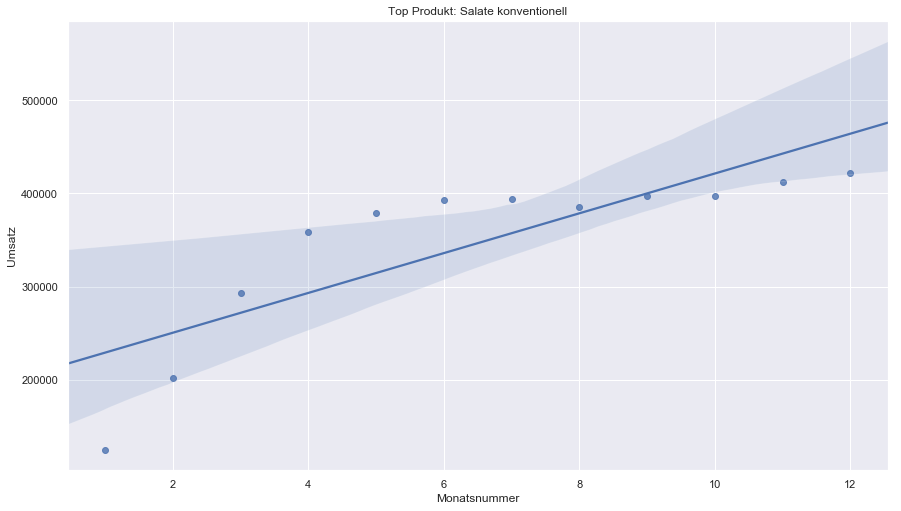

In [85]:
top_plot = sns.regplot(data = top_data, x = 'Monatsnummer', y = 'Umsatz').set_title("Top Produkt: " + top_product[0])

In [86]:
flop_data = data[data.Warengruppe == flop_product[0]].groupby('Monat').sum()
flop_data['Monatsnummer'] = range(1,13)
flop_data

,Kürzel,Einheit,Preis,Jahr,Umsatz,Monatsnummer
Monat,,,,,,
Januar,0,0,0.00,0,0.0,1
Februar,0,0,0.00,0,0.0,2
März,0,0,0.00,0,0.0,3
April,1013,950,1.75,2019,1662.5,4
Mai,1013,920,1.75,2019,1610.0,5
Juni,1013,940,1.75,2019,1645.0,6
Juli,1013,900,1.75,2019,1575.0,7
August,1013,900,1.75,2019,1575.0,8
September,1013,870,1.75,2019,1522.5,9


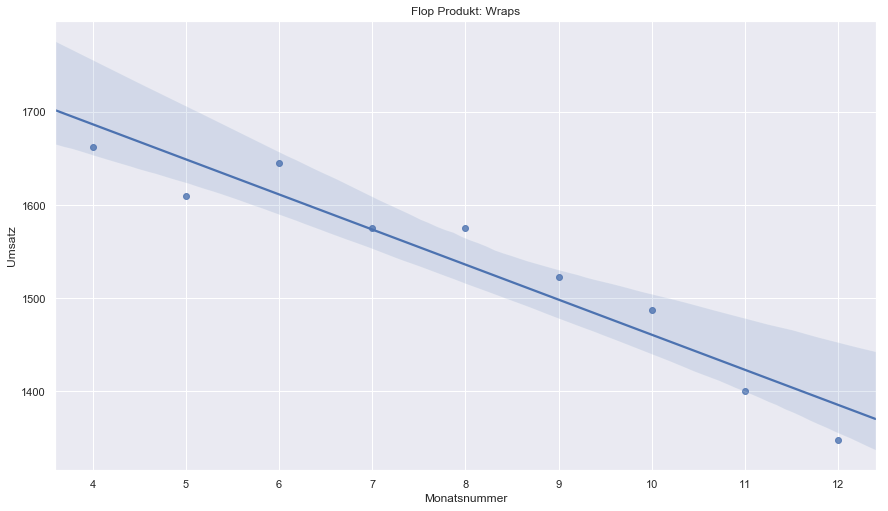

In [87]:
flop_plot = sns.regplot(data = flop_data[flop_data.Umsatz !=0], x = 'Monatsnummer', y = 'Umsatz').set_title("Flop Produkt: " + flop_product[0])

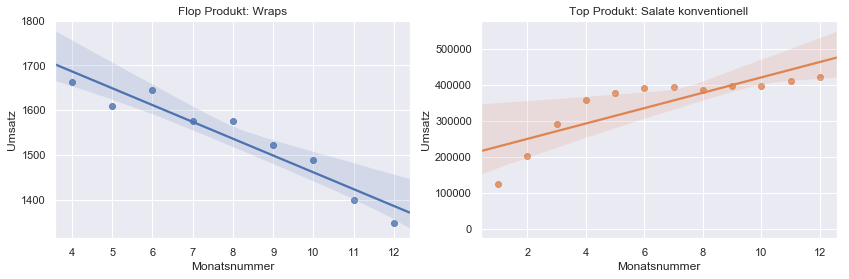

In [88]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(14, 4)
p1 = sns.regplot(data = flop_data[flop_data.Umsatz !=0], x = 'Monatsnummer', y = 'Umsatz', ax=axes[0]).set_title("Flop Produkt: " + flop_product[0])
p2 = sns.regplot(data = top_data, x = 'Monatsnummer', y = 'Umsatz', ax=axes[1]).set_title("Top Produkt: " + top_product[0])
fig.savefig(r'img\flopundtop.png')

## Latex Datei kompilieren

In [89]:
latex_jinja_env = jinja2.Environment(
    block_start_string = '\BLOCK{',
    block_end_string = '}',
    variable_start_string = '\VAR{',
    variable_end_string = '}',
    comment_start_string = '\#{',
    comment_end_string = '}',
    line_statement_prefix = '%%',
    line_comment_prefix = '%#',
    trim_blocks = True,
    autoescape = False,
    loader = jinja2.FileSystemLoader(os.path.abspath('.')))

In [90]:
template = latex_jinja_env.get_template('report_template.tex')
texfile = template.render(Gesamtumsatz = int(sales_year),
                      Maxmonat = max_sales_mon,
                      Maxumsatz = int(max_sales_val),
                      Minmonat = min_sales_mon,
                      Minumsatz = int(min_sales_val),
                      Kunde1 = top_customer[0],
                      Umsatz1 = int(top_customer[1]),
                      Kunde2 = second_customer[0],
                      Umsatz2 = int(second_customer[1]),
                      Kunde3 = third_customer[0],
                      Umsatz3 = int(third_customer[1]),
                      Topprodukt = top_product[0],
                      Topumsatz = int(top_product[1]),
                      Flopprodukt = flop_product[0],
                      Flopumsatz = int(flop_product[1])
                     )

In [91]:
with codecs.open('report.tex', 'w', 'utf-8') as file:
    file.write(texfile)

In [92]:
return_value = subprocess.call(['pdflatex', 'report.tex'], shell=False)
if(return_value):
    print('Fehler beim compilieren der tex Datei')